<a href="https://colab.research.google.com/github/HemanthPoojary/Hotel-Booking-Analysis/blob/main/Analysing_Hotel_Booking_Cancellation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing all the Libraries**

In [ ]:
import pandas as pd #to Handle all the data set
import matplotlib.pyplot as plt #creating visualizations
import seaborn as sns
import warnings  #this is used to ignore the warning message if we get
warnings.filterwarnings('ignore')

#**Loading the Datat set**

In [ ]:
from google.colab import files
df= files.upload()

Saving hotel_bookings Data set.csv to hotel_bookings Data set.csv


In [ ]:
import io 
df = pd.read_csv(io.BytesIO(df["hotel_bookings Data set.csv"]))

#**Explorartory Data Analysis and Data Cleaning**

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [ ]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [ ]:
df.shape

(119390, 32)

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df['reservation_status_date']= pd.to_datetime(df['reservation_status_date'])

In [ ]:
print(df['reservation_status_date'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 119390 entries, 0 to 119389
Series name: reservation_status_date
Non-Null Count   Dtype         
--------------   -----         
119390 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 932.9 KB
None


In [ ]:
df.describe() #this function will gives statistics details for only numeric fields

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.describe(include = 'object') # after inserting include function with describe we are able to get the statistical details of object data type

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [ ]:
for col in df.describe (include = 'object').columns:
       print(col)
       print(df[col].unique()) 
       print('-'*55) #this line of code is just to add some line between each paragraph 
#This formula is used to get the names of unique values in each object columns


hotel
['Resort Hotel' 'City Hotel']
-------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
-------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
-------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA'

In [ ]:
df.isnull().sum() #to check the number of missing values in each column

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
df.drop(['agent','company'], axis=1, inplace=True)
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [ ]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898
unique,2,12,5,177,7,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79302,13852,91863,48586,56402,97730,85601,73863,104163,89174,74745


In [ ]:
df=df[df['adr']<5000]

#**Analysing the Data and Building data Visualization**

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


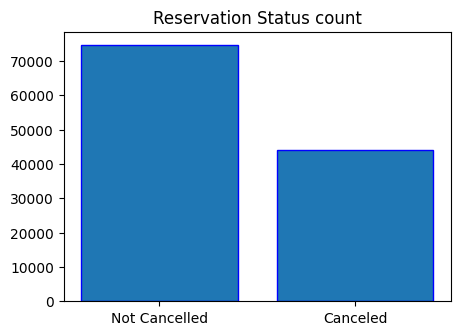

In [ ]:
#1) calculating percentage of cancellation of bookings
cancelled_perc = df['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)

plt.figure(figsize=(5,3.5))
plt.title('Reservation Status count')
plt.bar(['Not Cancelled','Canceled'],df['is_canceled'].value_counts(), edgecolor='b', width = 0.8) #here we used the above formula to get the count. One changes we did is we are not using normalize=True because we want the exact count not the percentage.
plt.show()

In the above calculation around 38% of bookings are cancelled from 2015-2017. It's half of the not cancelled reservation bookings, so it's high rate of cancellation. If it was around 5-10% then it's not a big problem.

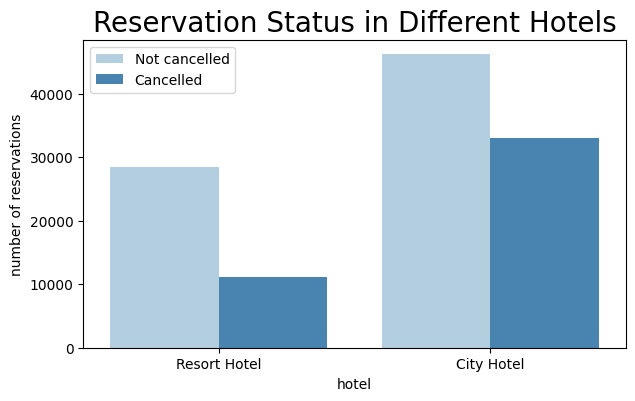

In [ ]:
#2) Calculating the total number of cancellation by Hotel wise, to identify which hotel got more cancellation
plt.figure(figsize=(7,4))
ax1= sns.countplot(x ='hotel', hue ='is_canceled', data = df, palette = 'Blues')
legend_lables,_=ax1. get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation Status in Different Hotels', size=20)
plt.xlabel('hotel')
plt.ylabel('number of reservations')
plt.legend(['Not cancelled', 'Cancelled'])
plt.show()

Above graph shows us that City hotels getting more Bookings compare to Resort Hotels, but at the same time City hotel bookings are getting cancelled more than Resort Hotels. So we need to identify the exact reason why city Hotel Bookings are getting cancelled and also need to identify why Resort Hotels are getting low reservation bookings.

In [ ]:
#3) We are checking the Percentage of Hotel boking and cancellation by different Hotels
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)*100

0    72.024952
1    27.975048
Name: is_canceled, dtype: float64

In [ ]:
City_hotel = df[df['hotel'] == 'City Hotel']
City_hotel['is_canceled'].value_counts(normalize= True)*100

0    58.291825
1    41.708175
Name: is_canceled, dtype: float64

From the Above Counts we can clearly understand that City Hotels Bookings are only 58% not getting cancelled comparing to City Hotel's not cancelling rate of 72%.

In [ ]:
#4) Now we are checking resort wise daily Avg booking price
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
City_hotel = City_hotel.groupby('reservation_status_date')[['adr']].mean()

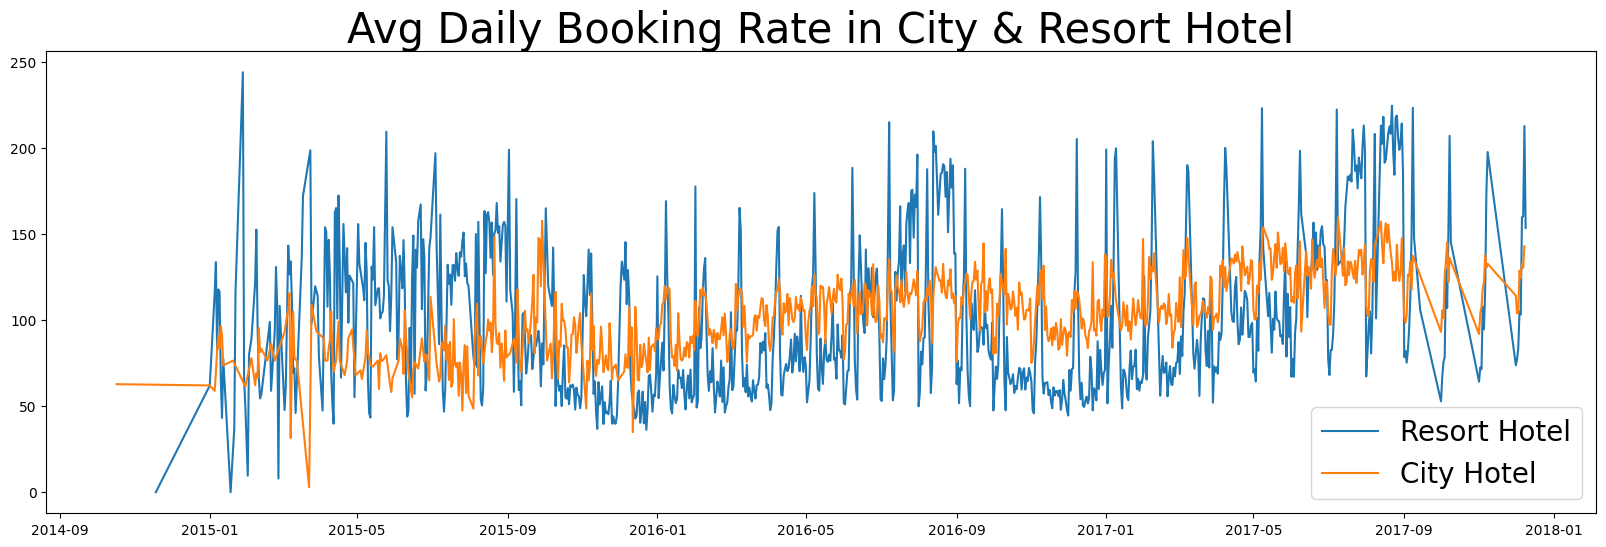

In [ ]:
plt.figure(figsize=(20,6))
plt.title('Avg Daily Booking Rate in City & Resort Hotel', size= 30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(City_hotel.index, City_hotel['adr'], label = 'City Hotel')
plt.legend(fontsize = 20)
plt.show()

Above graph proves that avg price for booking in City hotel is much lesser than resort Hotel for most of the days. May be during Weekends and festival season price may gone up as we assuming.

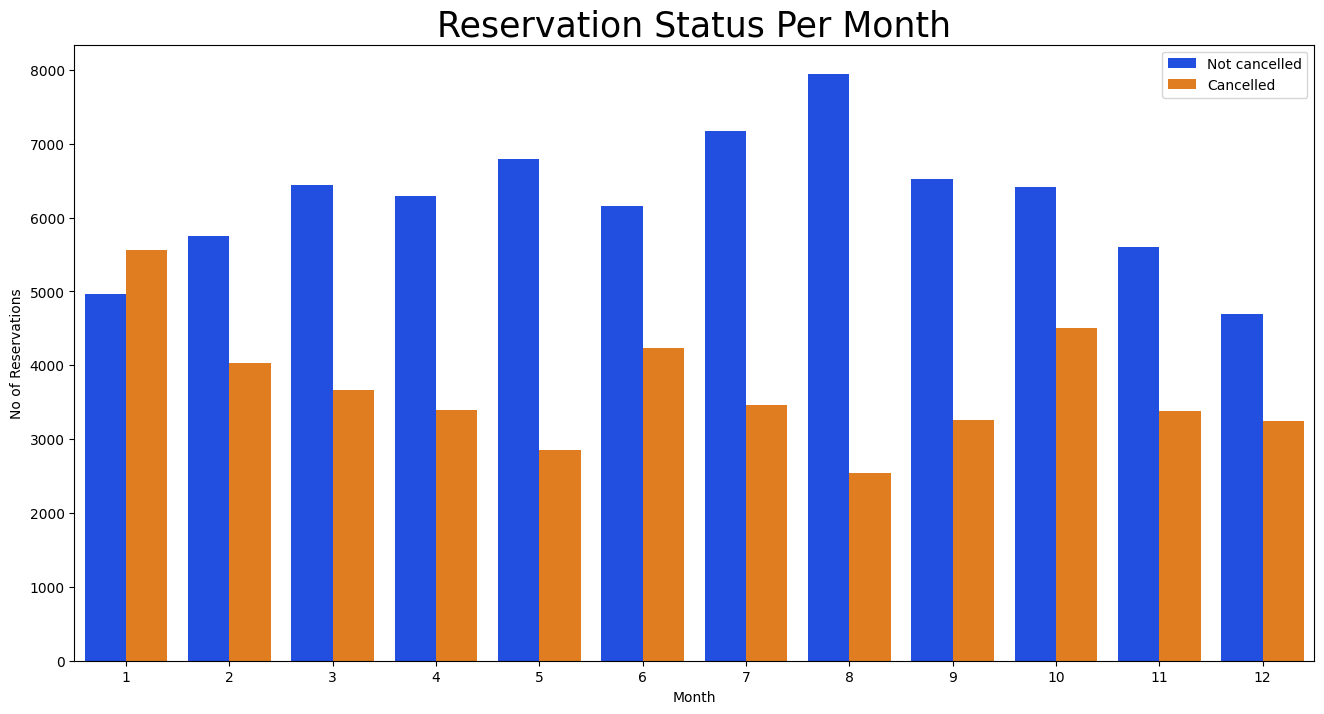

In [ ]:
#5) We are now checking in which month highest reservation happens and which month Highest cancelation happens.
#in our dataset we don't have Month column so using Resavation staus date column we are creating new column called "Month". We are using Countplot formula to get the count of each month reservation and cancellation.
df['month']= df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
ax1 = sns.countplot(x = 'month', hue = 'is_canceled', data = df, palette = 'bright')
legend_lables,_ =  ax1. get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation Status Per Month', size=25)
plt.xlabel('Month')
plt.ylabel('No of Reservations')
plt.legend(['Not cancelled', 'Cancelled'])
plt.show()

In the above graph we can understand that in the month of August there is a high reservation happened and in the month of Jan and Dec Lowest reservation happened. Same way In January highest number of cancellation happened and in August lowest cancellation happened. It shows that During high peak time cancellation is less but during Low peak reservation is less and cancellation is more.

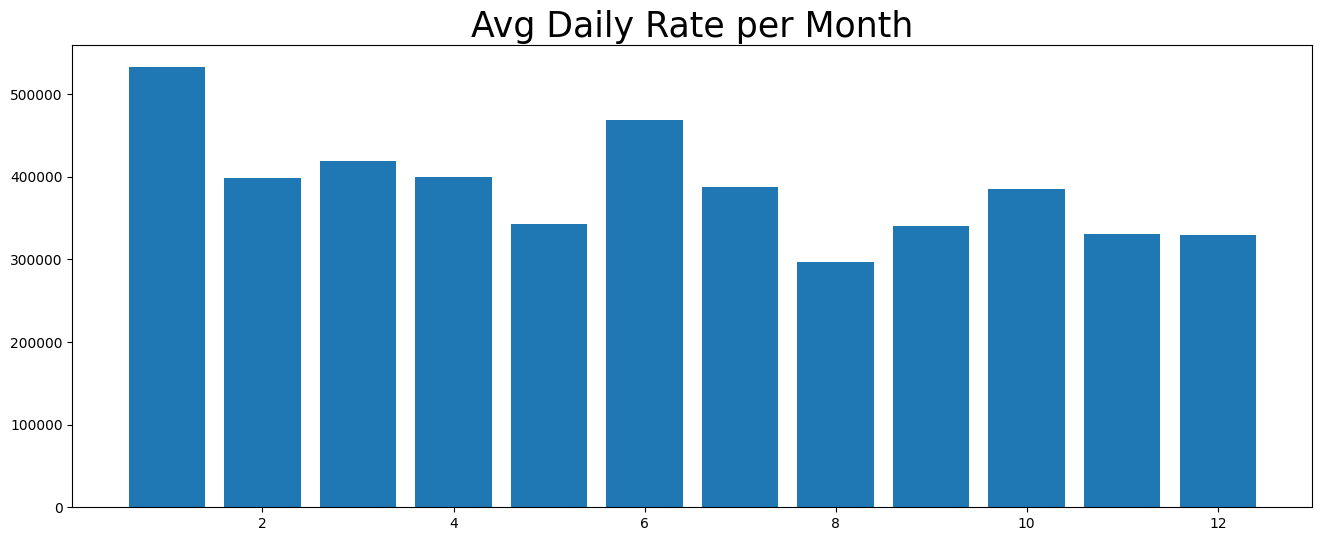

In [ ]:
#6)To understand the above graph even better we are now calculating the avg price per month so that we can understand is that price is the reason to increase and decrease the reservation and cancellation?
plt.figure(figsize=(16,6))
plt.title('Avg Daily Rate per Month', fontsize=25)
plt.bar('month','adr', data = df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())
plt.show()

If we check the above graph it’s clearly shows that During the month of Jan and June price of reservation is High so that most of the cancellation happened in these month and also less reservations happened in those months. It’s clearly states that when hike in the booking price reservation goes down and cancellation goes up and vice versa.

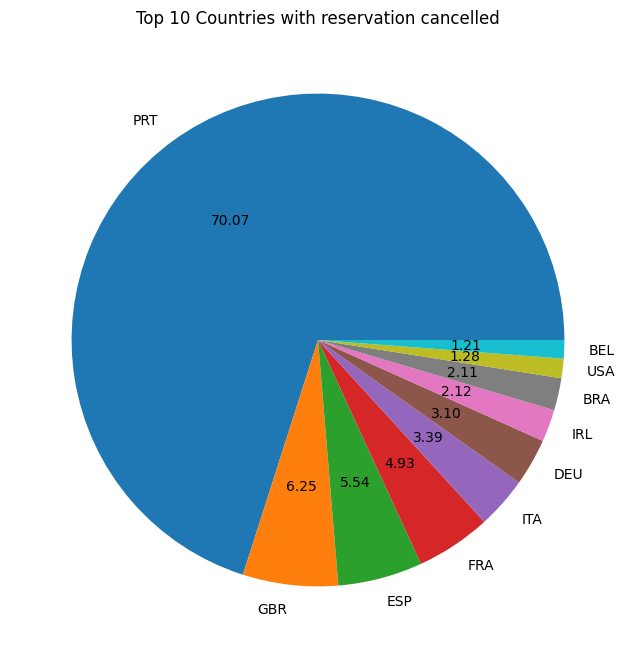

In [ ]:
#7) Now we are checking country wise cancellation rate to understand which country making highest booking and cancellation, so that we can understand which country we need to focus more to attract themeven better.
 #there are around 177 countries,we can't analyse on each and every country. So we are going with Top 10 countries on the basis of Highest bookings cancelled.
cancelled_data = df[df['is_canceled']==1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.title('Top 10 Countries with reservation cancelled')
plt.pie(top_10_country, autopct = '%.2f', labels= top_10_country.index)
plt.show()

Above pie chart shows that Portugal country is Highest among other countries on Cancellation of Bookings. So we can suggest the Hotels to focus more on Portugal country hotels on improvising the quality of service, properly fixing the pricing, adding different dishes as per countries requirement, arranging some events where public can enjoy with fun. Running more advertises, promotional discount offers etc.

In [ ]:
#8) Now we need to identify from where customers coming either through online portal or through offline travel agencies. So we can understand is the online booking takes lot of time or offline booking takes lot of time.
df['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [ ]:
df['market_segment'].value_counts(normalize=True)*100

Online TA        47.437698
Offline TA/TO    20.319268
Groups           16.658116
Direct           10.469566
Corporate         4.298679
Complementary     0.617341
Aviation          0.199332
Name: market_segment, dtype: float64

In [ ]:
cancelled_data['market_segment'].value_counts(normalize=True)*100

Online TA        46.969560
Groups           27.398532
Offline TA/TO    18.746603
Direct            4.348614
Corporate         2.215075
Complementary     0.203841
Aviation          0.117775
Name: market_segment, dtype: float64

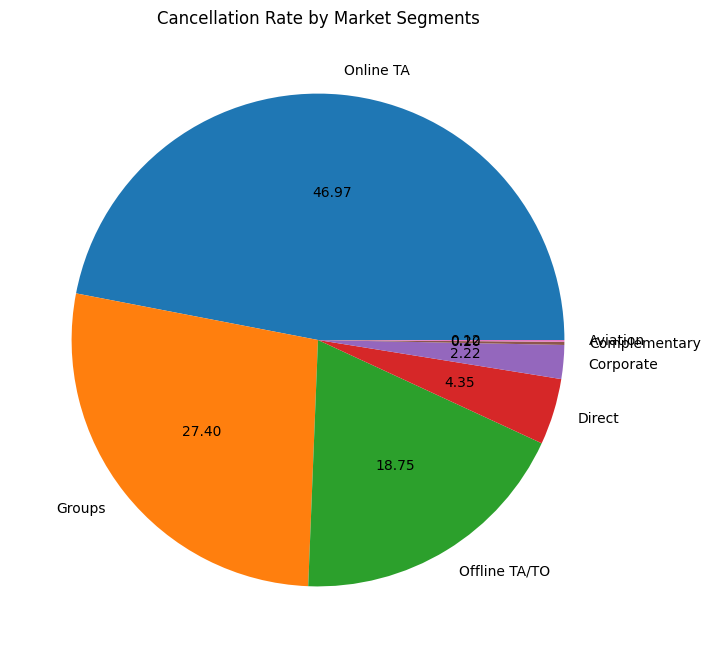

In [ ]:
cancelled_data = df[df['is_canceled']==1]
Market_segments = cancelled_data['market_segment'].value_counts()[:10]
plt.figure(figsize=(10,8))
plt.title('Cancellation Rate by Market Segments')
plt.pie(Market_segments, autopct = '%.2f', labels= Market_segments.index)
plt.show()

Note: Our Hypothesis was that people coming highest from Offline travel agencies but it’s went wrong. While calculating percentage of booking segment we got that 47% of booking is happening through Online Travel Agents.
In cancellation also Online bookings are getting cancelled more than other segments. Around 47% cancellation happending in Online booking travel agents.
Reason may be because of false information available in online and also the picture showing in online is different than actual hotel pictures. Facilities mentioned by online travel agencies are not available in actual hotels these are may be the problems.
So Hotels need to looking into every agencies websites and their booking criterias to understand where they are giving false info and false promisess on offers. 

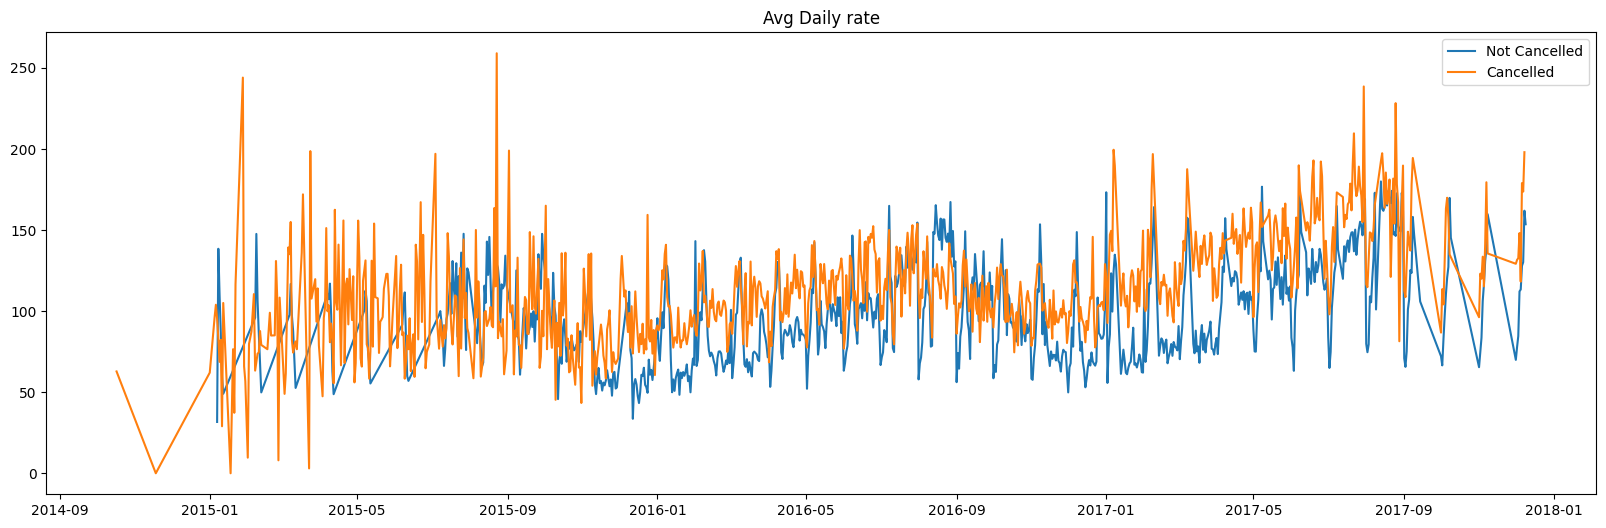

In [ ]:
#9) Now we are checking the Avg Daily rate price is high in cancelled tickets or non cancelled tickets?
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace = True)
cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

not_cancelled_data= df[df['is_canceled']==0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace = True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

plt.figure(figsize=(20,6))
plt.title('Avg Daily rate')
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label= 'Not Cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label= 'Cancelled')
plt.legend()
plt.show()

In [ ]:
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date']>'2016') & (cancelled_df_adr['reservation_status_date']<'2017-09')]
not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date']>'2016') & (not_cancelled_df_adr['reservation_status_date']<'2017-09')]

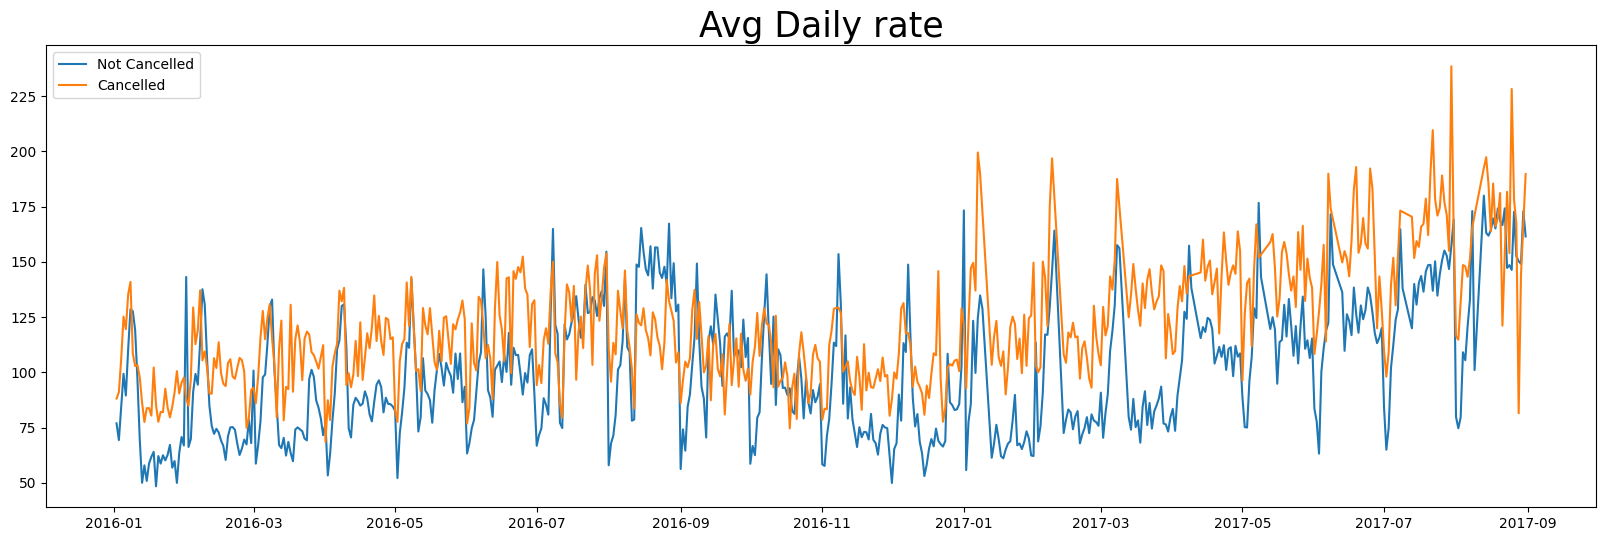

In [ ]:
plt.figure(figsize=(20,6))
plt.title('Avg Daily rate', fontsize=25)
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label= 'Not Cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label= 'Cancelled')
plt.legend()
plt.show()

If we see the above line graph we can clearly consider that whenever price gone up tickets got cancelled and vice versa. So main reason for cancellation is pricing of bookings.